In [1]:
# We will now be importing some required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Loading the dataset
dataset = pd.read_csv('drive/My Drive/SEIS764/customers.csv')

X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [3]:
# Checking target and predicting features
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [4]:
# Encoding categorical data
# Encoding the Independent Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Label Encoding Gender
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

#Dealing with the categorical Geography column
from sklearn.compose import make_column_transformer
onehotencoder = make_column_transformer((OneHotEncoder(), [1]), remainder='passthrough')
X = onehotencoder.fit_transform(X)

#Removing the extra dummy variable
X = X[:, 1:]

In [5]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
import tensorflow as tf

In [8]:
# Define the model
model = tf.keras.models.Sequential()

In [9]:
# Adding the first layer
model.add(tf.keras.layers.Dense(units=6, input_shape=[11],activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))

#Adding a second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))

#Adding an output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 8ms/step - loss: 0.6426 - accuracy: 0.7271 - val_loss: 0.5602 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5092 - accuracy: 0.7960 - val_loss: 0.4670 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4530 - accuracy: 0.7960 - val_loss: 0.4354 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4326 - accuracy: 0.7960 - val_loss: 0.4234 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4230 - accuracy: 0.7960 - val_loss: 0.4155 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.7960 - val_loss: 0.4109 - val_accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4094 - accuracy: 0.7960 - val_loss: 0.4033 - val_accuracy: 0.7975

In [12]:
# Evaluate the model, prints loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8621
Train score: [0.33324846625328064, 0.8621249794960022]
63/63 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.8590
Test score: [0.3377910554409027, 0.859000027179718]


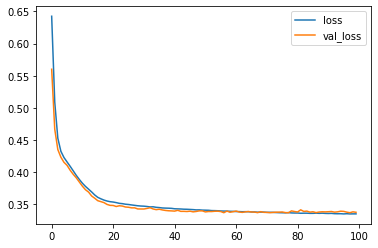

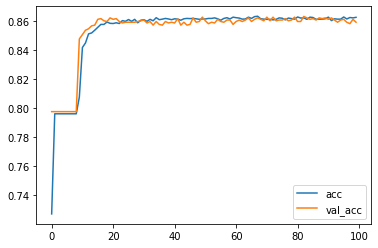

In [13]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [14]:
!pip install scikeras[tensorflow]

In [15]:
#Evaluating our Neural Network
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [16]:
def buildNN():
    # Define the model
    model = tf.keras.models.Sequential()

    #Adding a first hidden layer
    model.add(tf.keras.layers.Dense(units=6, input_shape=[11], activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.1))

    #Adding a second hidden layer
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.1))

    #Adding an output layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
classifier = KerasClassifier(model = buildNN, batch_size=10, epochs=100)
accuracy = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10,verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
720/720 [==============================] - 5s 6ms/step - loss: 0.5099 - accuracy: 0.7960
Epoch 2/100
720/720 [==============================] - 4s 5ms/step - loss: 0.4515 - accuracy: 0.7960
Epoch 3/100
720/720 [==============================] - 3s 5ms/step - loss: 0.4365 - accuracy: 0.7960
Epoch 4/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4291 - accuracy: 0.7960
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4239 - accuracy: 0.7990
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4189 - accuracy: 0.8107
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4140 - accuracy: 0.8129
Epoch 8/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8171
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4049 - accuracy: 0.8286
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3988 - accura

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min remaining:    0.0s


Epoch 1/100
720/720 [==============================] - 3s 3ms/step - loss: 0.5290 - accuracy: 0.7739
Epoch 2/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4597 - accuracy: 0.7958
Epoch 3/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4257 - accuracy: 0.8090
Epoch 4/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4080 - accuracy: 0.8250
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3999 - accuracy: 0.8296
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3939 - accuracy: 0.8296
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3881 - accuracy: 0.8328
Epoch 8/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3848 - accuracy: 0.8315
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3809 - accuracy: 0.8381
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3769 - accura

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.1min remaining:    0.0s


720/720 [==============================] - 3s 3ms/step - loss: 0.5468 - accuracy: 0.7499
Epoch 2/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4310 - accuracy: 0.8060
Epoch 3/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4045 - accuracy: 0.8149
Epoch 4/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3905 - accuracy: 0.8172
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3827 - accuracy: 0.8179
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3776 - accuracy: 0.8190
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3738 - accuracy: 0.8196
Epoch 8/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8194
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3688 - accuracy: 0.8388
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3671 - accuracy: 0.8479
E

KeyboardInterrupt: ignored

In [ ]:
#Hyperparameter tuning of Neural Network
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def buildNN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=6, input_shape=[11], activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

classifier = KerasClassifier(model = buildNN)
parameters = {'batch_size':[25,32], 'epochs':[10,15], 'optimizer':['adam','rmsprop']}
grid_search = GridSearchCV(estimator =classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_acc=grid_search.best_score_

print(best_param)
print(best_acc)